In [1]:
import pandas as pd

benin = pd.read_csv("C:/Users/mintesinot/10_acadamey/solar-challenge-week1/data/benin-malanville_clean.csv", parse_dates=["Timestamp"])
sierra_leone = pd.read_csv("C:/Users/mintesinot/10_acadamey/solar-challenge-week1/data/sierraleone-bumbuna_clean.csv", parse_dates=["Timestamp"])
togo = pd.read_csv("C:/Users/mintesinot/10_acadamey/solar-challenge-week1/data/togo-dapaong_qc_clean.csv", parse_dates=["Timestamp"])

benin["Country"] = "Benin"
sierra_leone["Country"] = "Sierra Leone"
togo["Country"] = "Togo"

df_all = pd.concat([benin, sierra_leone, togo], ignore_index=True)


C:\Users\mintesinot\AppData\Local\Temp\ipykernel_41748\547777730.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x="Country", y=metric, palette="Set2")


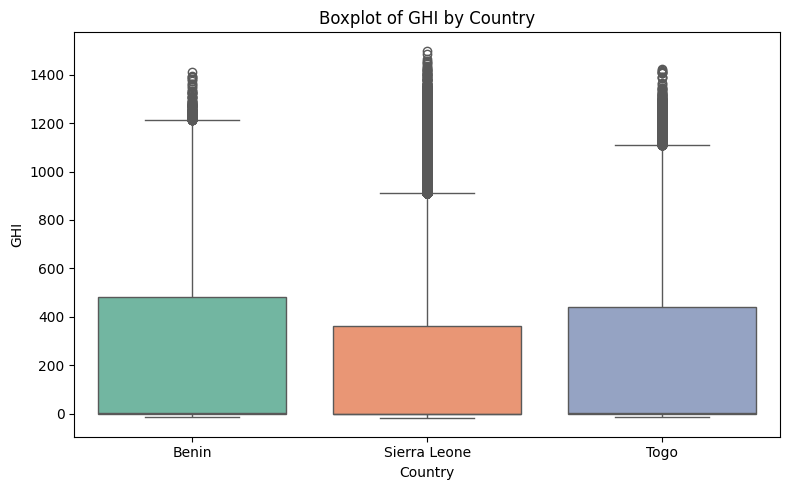

C:\Users\mintesinot\AppData\Local\Temp\ipykernel_41748\547777730.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x="Country", y=metric, palette="Set2")


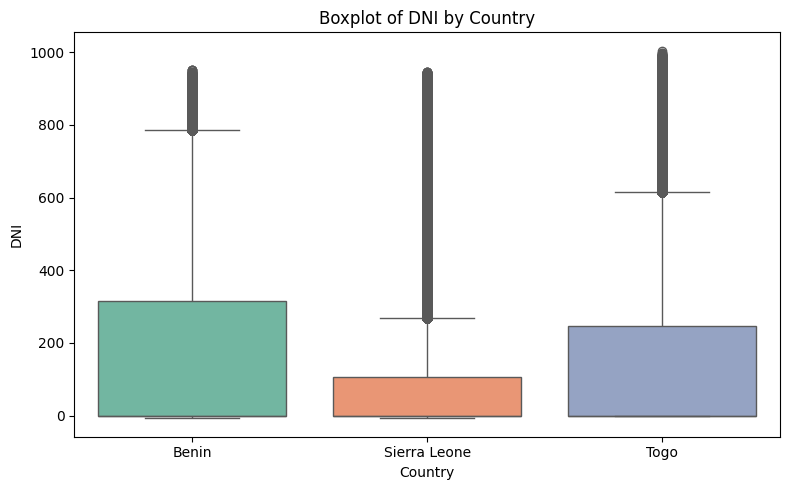

C:\Users\mintesinot\AppData\Local\Temp\ipykernel_41748\547777730.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_all, x="Country", y=metric, palette="Set2")


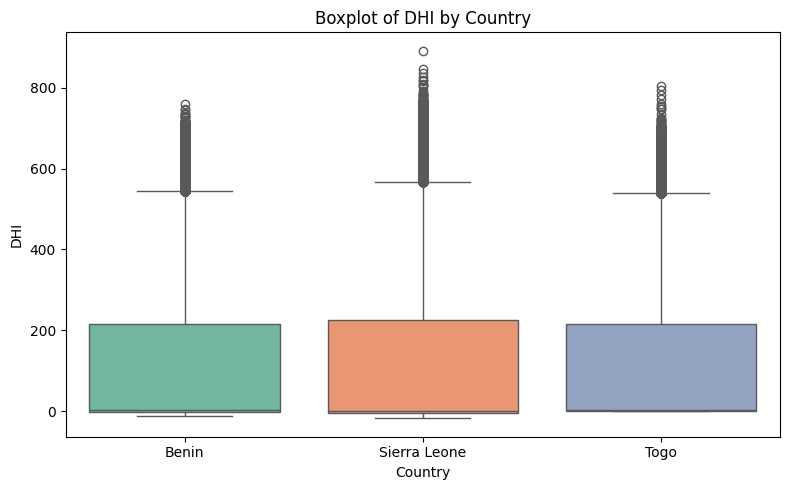

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
#  Metric Comparison: Boxplots
for metric in ["GHI", "DNI", "DHI"]:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_all, x="Country", y=metric, palette="Set2")
    plt.title(f"Boxplot of {metric} by Country")
    plt.tight_layout()
    plt.show()


In [5]:
#Summary Table
summary_stats = df_all.groupby("Country")[["GHI", "DNI", "DHI"]].agg(["mean", "median", "std"]).round(2)
summary_stats


GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         240.56    1.8  331.13  167.19   -0.1  261.71  115.36    1.6   
Sierra Leone  201.96    0.3  298.50  116.38   -0.1  218.65  113.72   -0.1   
Togo          230.56    2.1  322.53  151.26    0.0  250.96  116.44    2.5   

                      
                 std  
Country               
Benin         158.69  
Sierra Leone  158.95  
Togo          156.52

### Key Observations

- 🇹🇬 **Togo** has the **highest median GHI**, indicating consistent solar potential.
- 🇸🇱 **Sierra Leone** shows the **widest variability in DNI**, possibly due to more variable weather.
- 🇧🇯 **Benin** maintains **stable DHI** with a moderate median and relatively low standard deviation.

In [7]:
# Statistical Testing (ANOVA or Kruskal–Wallis)
from scipy.stats import f_oneway, kruskal

# One-way ANOVA
f_stat, p_val_anova = f_oneway(
    benin["GHI"].dropna(),
    sierra_leone["GHI"].dropna(),
    togo["GHI"].dropna()
)

# Kruskal–Wallis
h_stat, p_val_kruskal = kruskal(
    benin["GHI"].dropna(),
    sierra_leone["GHI"].dropna(),
    togo["GHI"].dropna()
)

print(f"ANOVA p-value: {p_val_anova:.4f}")
print(f"Kruskal-Wallis p-value: {p_val_kruskal:.4f}")


ANOVA p-value: 0.0000
Kruskal-Wallis p-value: 0.0000


### Statistical Test Summary

- **ANOVA p-value**: 0.0000  
- **Kruskal–Wallis p-value**: 0.0000  

Since both p-values are below the common significance threshold (0.05), we reject the null hypothesis.  
➡️ **This indicates that the differences in GHI between Benin, Sierra Leone, and Togo are statistically significant.**

C:\Users\mintesinot\AppData\Local\Temp\ipykernel_41748\1404865491.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette="coolwarm")


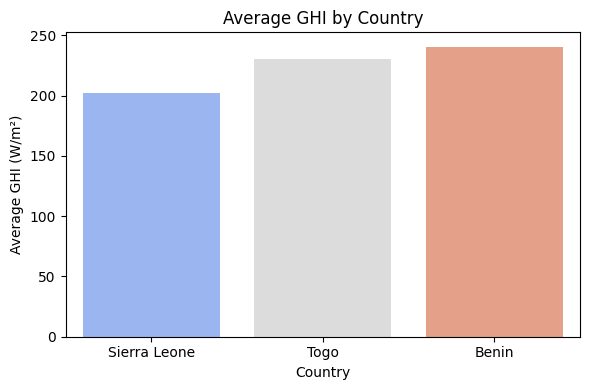

In [8]:
#   Bar Chart of Avg GHI
avg_ghi = df_all.groupby("Country")["GHI"].mean().sort_values()

plt.figure(figsize=(6, 4))
sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette="coolwarm")
plt.ylabel("Average GHI (W/m²)")
plt.title("Average GHI by Country")
plt.tight_layout()
plt.show()
